<a href="https://colab.research.google.com/github/JacobHassan/ProjektPUM/blob/main/projekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold

In [60]:
pip install

     -------------------------------------- 250.0/250.0 KB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jabko\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [101]:
df = pd.read_csv(r'NY-House-Dataset.csv',sep=';',
                 index_col =  False,
                 on_bad_lines='skip')


In [102]:
headers = pd.read_csv(r'NY-House-Dataset.csv', sep=';',nrows=0)
header_names = headers.columns.tolist()

In [103]:
column_rename_dict = {old_name: new_name for old_name, new_name in zip(df.columns, header_names)}

df.rename(columns=column_rename_dict, inplace=True)

In [104]:
str_col = ['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME' , 'LONG_NAME', 'FORMATTED_ADDRESS']
int_col = ['BEDS', 'BATH','PROPERTYSQFT']
float_col = ['PRICE']

In [105]:
df.shape

(4801, 17)

In [106]:
df.isna().any()

BROKERTITLE                    False
TYPE                           False
PRICE                          False
BEDS                           False
BATH                           False
PROPERTYSQFT                   False
ADDRESS                        False
STATE                          False
MAIN_ADDRESS                   False
ADMINISTRATIVE_AREA_LEVEL_2    False
LOCALITY                       False
SUBLOCALITY                    False
STREET_NAME                    False
LONG_NAME                      False
FORMATTED_ADDRESS              False
LATITUDE                       False
LONGITUDE                      False
dtype: bool

In [107]:
df[str_col] = df[str_col].apply(lambda x: x.astype(str))

In [108]:
df[int_col] = df[int_col].apply(lambda x: x.astype(int))

In [109]:
df[float_col] = df[float_col].apply(lambda x: x.astype(float))

In [110]:
df.drop_duplicates(inplace = True)

In [111]:
df.loc[df['BATH'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [112]:
df.loc[df['PRICE'] <0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [113]:
df.loc[df['BEDS']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [114]:
df.loc[df['PROPERTYSQFT']<0]

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE


In [115]:
df['FORMATTED_ADDRESS'] = df['FORMATTED_ADDRESS'].apply(lambda x: x.replace('#', ''))


In [116]:
le = LabelEncoder()

In [117]:
columns_to_encode = ['TYPE', 'STATE', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'SUBLOCALITY', 'STREET_NAME']


In [118]:
df[columns_to_encode] = df[columns_to_encode].apply(LabelEncoder().fit_transform)

In [119]:
df.to_excel('test.xlsx')

In [120]:
numeric_columns = ['BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE']
df_numeric = df[numeric_columns]

scaler = preprocessing.StandardScaler().fit(df_numeric)


df_scaled = pd.DataFrame(scaler.transform(df_numeric), columns=numeric_columns)


df[numeric_columns] = df_scaled

In [121]:
X = df[['BATH', 'BEDS', 'PROPERTYSQFT']]
y = df['PRICE']

In [122]:
X = X.dropna()
y = y[X.index]


<Axes: >

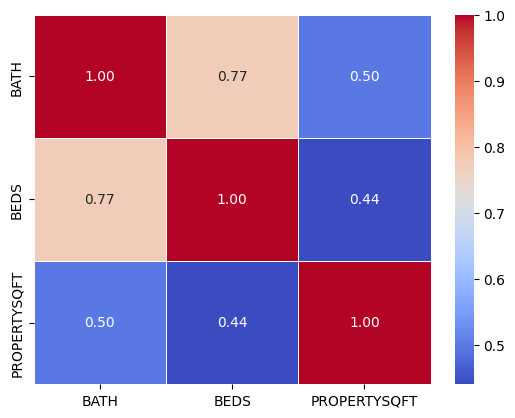

In [123]:
selected_df =  df[['BATH', 'BEDS', 'PROPERTYSQFT']]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

<Axes: >

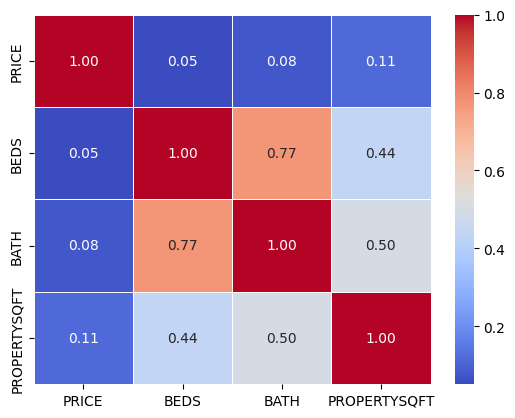

In [35]:
#Powinny byc chyba tyko X ale nie jestem pewien 
#selected_df = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']]
#sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

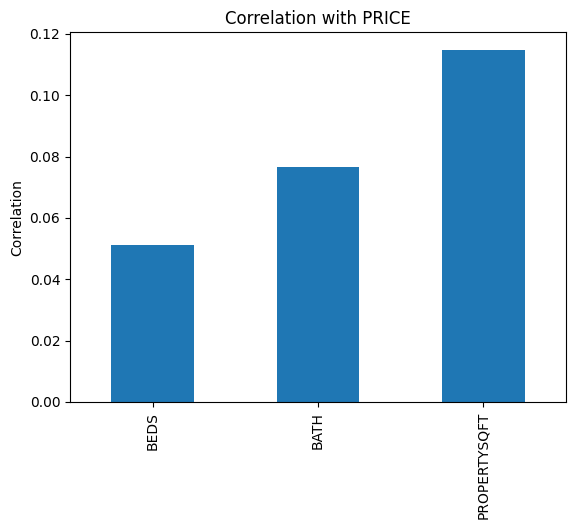

In [124]:
# Select the columns
cor_df = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',]]

# Calculate the correlation with 'PRICE'
correlation = cor_df.corr()['PRICE'].drop('PRICE')

# Plot the correlation values
correlation.sort_values().plot(kind='bar')
plt.title('Correlation with PRICE')
plt.ylabel('Correlation')
plt.show()

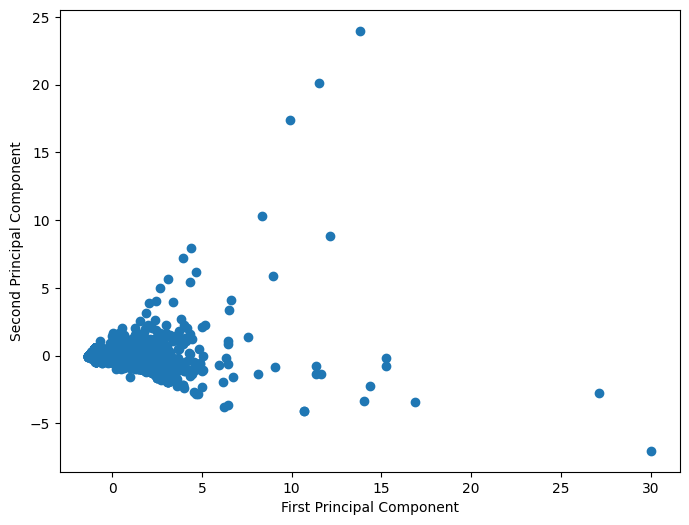

In [125]:

selected_df = selected_df.dropna()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(selected_df)
df_pca = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])


plt.figure(figsize=(8,6))
plt.scatter(df_pca['principal component 1'], df_pca['principal component 2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [126]:
df.dtypes

BROKERTITLE                     object
TYPE                             int32
PRICE                          float64
BEDS                           float64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                            int32
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2      int32
LOCALITY                         int32
SUBLOCALITY                      int32
STREET_NAME                      int32
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
reg.coef_
reg.intercept_
y_predict = reg.predict(X_test)

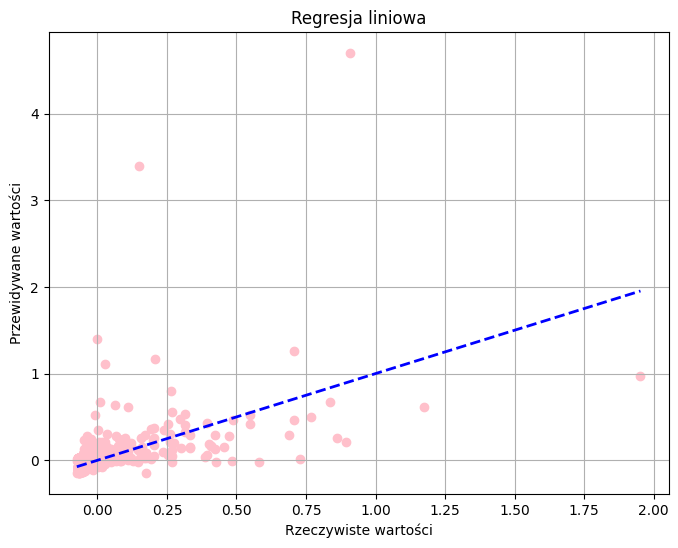

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, color='pink')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', linewidth=2)
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Regresja liniowa')
plt.grid(True)
plt.show()

In [129]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.linear_model import  HuberRegressor

In [131]:
y_true = y_test
mean_absolute_error(y_true,y_predict)

0.06577736277106458

In [132]:
y_true = y_test
median_absolute_error(y_true,y_predict)

0.041449745043020556

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 17%

In [134]:
y_true = y_test
r2_score(y_true,y_predict)

-1.1038854414557742

In [145]:
huber = HuberRegressor().fit(X_train, y_train)
huber.coef_
huber.intercept_
y_predict_huber = huber.predict(X_test)

In [136]:
y_true = y_test
mean_absolute_error(y_true,y_predict_huber)

0.03567176337736954

In [137]:

y_true = y_test
median_absolute_error(y_true,y_predict_huber)
     

0.011043877503444322

SŁABE DOPASOWANIE DANYCH DO MODELU NA POZIOMIE 19%

In [138]:
y_true = y_test
r2_score(y_true,y_predict_huber)

0.19668270937025245

In [141]:
from sklearn.model_selection import cross_val_score
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
lin = LinearRegression()
cv_scores = cross_val_score(lin, X , y, cv=rkf, scoring='neg_mean_absolute_error')
print(cv_scores)

[-0.05846978 -0.05642938 -0.05917343 -0.05916568 -0.12212773 -0.05396956
 -0.11755834 -0.06341557 -0.07069467 -0.05461393 -0.06653152 -0.06331708
 -0.05740644 -0.11901917 -0.05527878]
